In [7]:
from prompt_to_prompt.ptp_utils import text2image_ldm_stable, view_images
from prompt_to_prompt.attention import AttentionStore
from prompt_to_prompt.visualise import show_cross_attention

In [8]:
import torch
from diffusers import StableDiffusionPipeline

In [9]:
NUM_DIFFUSION_STEPS = 50
GUIDANCE_SCALE = 7.5
MAX_NUM_WORDS = 77
LOW_RESOURCE = False

In [10]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
ldm_stable = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to(device)
tokenizer = ldm_stable.tokenizer

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


In [11]:
def run_and_display(prompts, controller, latent=None, run_baseline=False, generator=None):
    if run_baseline:
        print("w.o. prompt-to-prompt")
        images, latent = run_and_display(prompts, EmptyControl(), latent=latent, run_baseline=False, generator=generator)
        print("with prompt-to-prompt")
    images, x_t = ptp_utils.text2image_ldm_stable(ldm_stable, prompts, controller, latent=latent, num_inference_steps=NUM_DIFFUSION_STEPS, guidance_scale=GUIDANCE_SCALE, generator=generator, low_resource=LOW_RESOURCE)
    ptp_utils.view_images(images)
    return images, x_t

  0%|          | 0/51 [00:00<?, ?it/s]

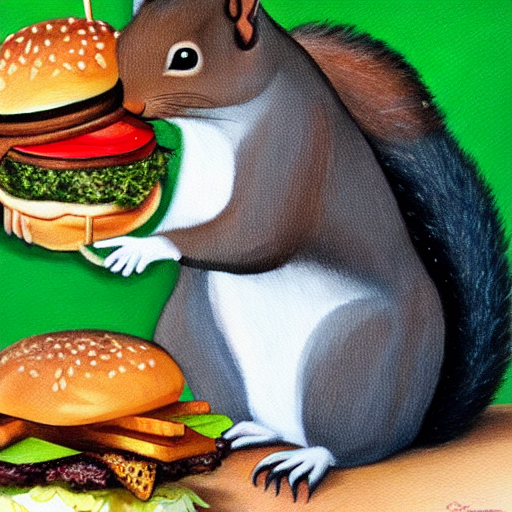

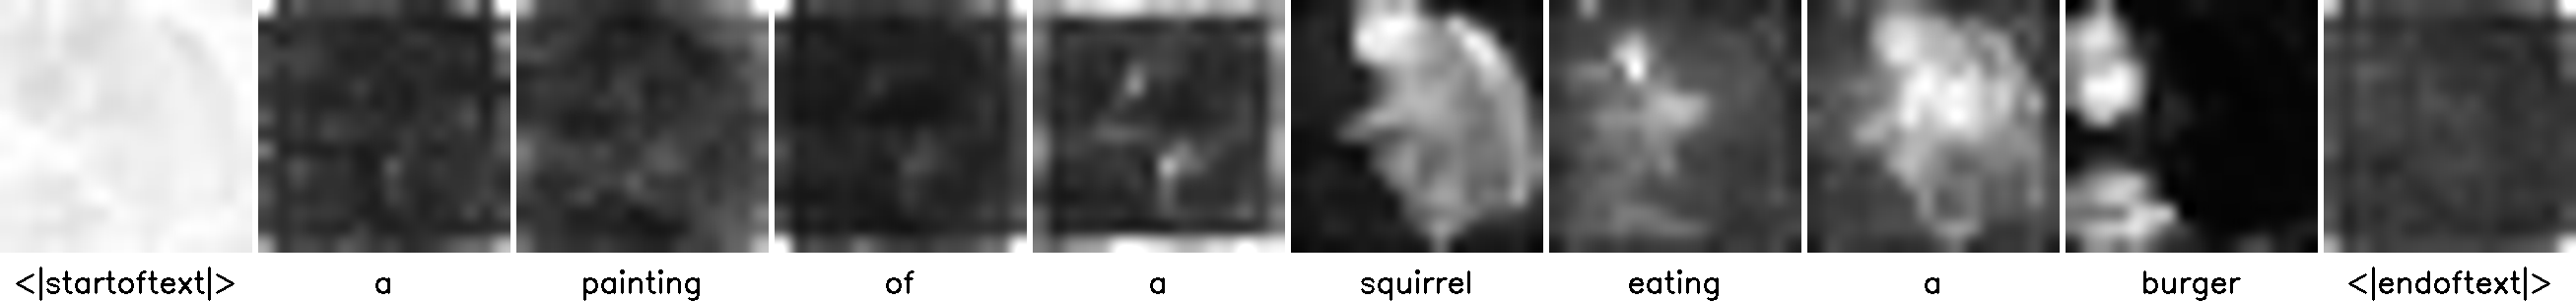

In [12]:
g_cpu = torch.Generator().manual_seed(8888)
prompts = ["A painting of a squirrel eating a burger"]
controller = AttentionStore(low_resource=LOW_RESOURCE)
image, x_t = run_and_display(prompts, controller, latent=None, run_baseline=False, generator=g_cpu)
show_cross_attention(controller, tokenizer, prompts, res=16, from_where=("up", "down"))